# Aprendizaje de maquinas no supervisado

En este capitulo analizaremos los algoritmos de aprendizaje no supervisado. En el aprendizaje no supervisado, al algoritmo de aprendizaje sólo se le muestran los datos de entrada y se le pide que extraiga el conocimiento de estos datos.

También, el aprendizaje no supervisado es una clase de técnicas de aprendizaje automático para descubrir patrones en los datos. Por ejemplo, encontrar los "clusters" naturales de los clientes basándose en sus historiales de compra, o buscar patrones y correlaciones entre estas compras, y utilizar estos patrones para expresar los datos de forma comprimida. Estos son ejemplos de técnicas de aprendizaje no supervisado denominadas "clustering" y "reducción de dimensiones". 

El aprendizaje no supervisado se define en oposición al aprendizaje supervisado. Un ejemplo de aprendizaje supervisado es utilizar las mediciones de los tumores para clasificarlos como benignos o cancerosos. En este caso, el descubrimiento de patrones está guiado, o "supervisado", para que los patrones sean lo más útiles posible para predecir la etiqueta: benigno o canceroso. El aprendizaje no supervisado, en cambio, es un aprendizaje sin etiquetas. Es puro descubrimiento de patrones, sin estar guiado por una tarea de predicción. 

## Tipos de aprendizaje no supervisado

Los tipos de aprendizaje no supervisado son:

- Las `transformaciones no supervisadas` de un conjunto de datos son algoritmos que crean una nueva representación de los datos que podría ser más fácil de entender para los humanos u otros algoritmos de aprendizaje automático en comparación con la representación original de los datos. Una aplicación común de las t`ransformaciones no supervisadas` es la `reducción de la dimensionalidad`, que toma una representación de alta dimensión de los datos, que consiste en muchas características, y encuentra una nueva forma de representar estos datos que resuma las características esenciales con menos características. Una aplicación común de la reducción de la dimensionalidad es la reducción a dos dimensiones con fines de visualización.

- Los `algoritmos de clustering`, por su parte, dividen los datos en distintos grupos de elementos similares. Consideremos el ejemplo de subir fotos a una red social. Para permitirle organizar sus fotos, el sitio podría querer agrupar las fotos que muestran la misma persona. Sin embargo, el sitio no sabe qué fotos muestran a quién, y no sabe cuántas personas diferentes aparecen en tu colección de fotos. Un enfoque sensato sería extraer todas las caras y dividirlas en grupos de caras que se parezcan. Con suerte, estos corresponden a la misma persona, y las imágenes pueden ser agrupar las imágenes.

## Desafíos del aprendizaje no supervisado

- Un reto importante en el aprendizaje no supervisado es evaluar si el algoritmo aprendió algo útil. 

- Los algoritmos de aprendizaje no supervisado suelen aplicarse a datos que no contienen ninguna información de etiquetas, por lo que no sabemos cuál debería ser la salida correcta. Por lo tanto, es muy difícil decir si un modelo `lo hizo bien`. Por ejemplo, nuestro hipotético algoritmo de agrupación podría haber agrupado todas las fotos que muestran caras de perfil y todas las fotos de caras completas. Esta sería, sin duda, una forma posible de dividir una colección de imágenes de rostros de personas, pero no es la que buscábamos. Sin embargo, no hay forma de `decirle` al algoritmo lo que estamos buscando, y a menudo la única forma de evaluar el resultado de un algoritmo no supervisado es inspeccionarlo manualmente.

- Los algoritmos no supervisados se utilizan a menudo en un entorno exploratorio, cuando un científico de datos quiere entender mejor los datos, más que como parte de un sistema automático más amplio. 

- Otra aplicación habitual de los algoritmos no supervisados es como paso previo al procesamiento de los algoritmos supervisados. El aprendizaje de una nueva representación de los datos puede a veces mejorar la precisión de los algoritmos supervisados, o puede conducir a un menor consumo de memoria y tiempo.

Antes de comenzar con los algoritmos "reales" no supervisados, discutiremos brevemente algunos métodos simples de preprocesamiento que a menudo resultan útiles. Aunque el preprocesamiento y el escalado se utilizan a menudo junto con los algoritmos de aprendizaje supervisado, los métodos de escalado no hacen uso de la información supervisada, lo que los convierte en no supervisados.

## Preprocesamiento y escalado

En el capítulo anterior vimos que algunos algoritmos, como las redes neuronales y las maquins de soporte vectorial son muy sensibles a la escala de los datos. Por lo tanto, una práctica común es ajustar las características para que la representación de los datos sea más adecuada para estos algoritmos.

A menudo, se trata de un simple reescalado y desplazamiento de los datos por característica. Por ejemplo:

In [1]:
import mglearn

In [2]:
import matplotlib.pyplot as plt
import numpy as np

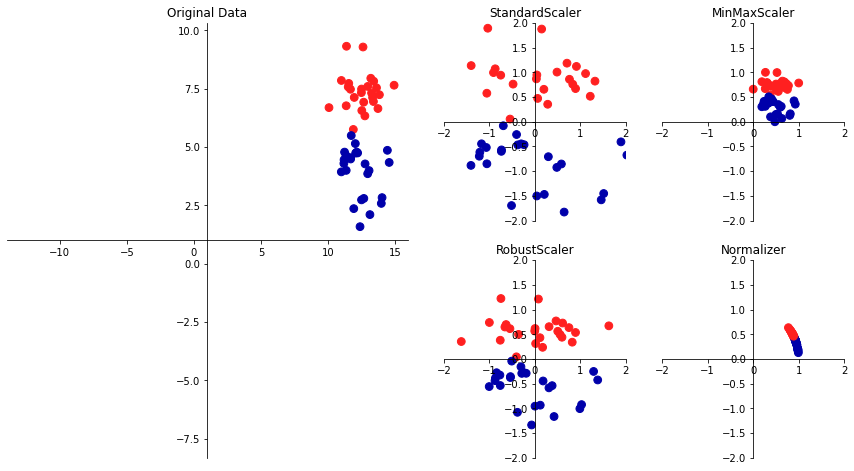

In [3]:
mglearn.plots.plot_scaling()

Podemos encontrar distintos de tipo de reescaladores:

- El `StandardScaler` en scikit-learn asegura que para cada la media es 0 y la varianza es 1, lo que hace que todas las características tengan la misma magnitud. Sin embargo, este escalado no asegura ningún valor mínimo y máximo en particular para las características. 
$$
Z = \frac{X-\mu}{\sigma}
$$

- El `RobustScaler` funciona de forma similar al `StandardScaler` en que asegura propiedades estadísticas para cada característica que garantizan que están en la misma escala. Sin embargo, el `RobustScaler` utiliza la mediana y los cuartiles, en lugar de la media y varianza. Esto hace que el `RobustScaler` ignore los puntos de datos que son muy diferentes del resto (como los errores de medición). Estos puntos de datos extraños también se llamados `outliers`, y pueden dar problemas a otras técnicas de escalado.
$$
X_{robustScaler}= \frac{X- x_{Q_{2}}}{x_{Q_3}-x_{Q_1}}
$$

- El `MinMaxScaler`, por otro lado, desplaza los datos de manera que todas las características estén exactamente entre 0 y 1. Para el conjunto de datos bidimensional esto significa que todos los datos están contenidos dentro del rectángulo creado por el eje $x$ entre 0 y 1 y el eje $y$ entre 0 y 1.
$$
X_{MinMaxScaler}= \frac{X- x_{min}}{x_{max}-X_{min}}
$$

- El `Normalizer` realiza un tipo de reescalado muy diferente. Escala cada punto de datos de manera que el vector de características tenga una longitud euclidiana de 1. En otras palabras, proyecta un punto de datos en el círculo (o esfera, en el caso de las dimensiones superiores) con un radio de 1. Esto significa que cada punto de datos se puede radio de 1. Esto significa que cada punto de datos está escalado por un número diferente (por la inversa de su longitud). Esta normalización se utiliza a menudo cuando sólo importa la dirección (o ángulo) de los datos, y no la longitud del vector de características. Estas son las normas que se usan
$$ 
\begin{align*}
||x||_1 &= |x_1|+\cdots+|x_n|\\
||x||_2 &= \sqrt{x_1^2+\cdots+x_n^2}\\
||x||_{\infty} &= \max\{|x_1|,...,|x_n|\}
\end{align*}
$$

## Aplicación de transformaciones de datos

Ahora utilizaremos el conjunto de datos sobre el cáncer que vimos en el capítulo 2. Los métodos de preprocesamiento, como los escaladores, suelen aplicarse antes de aplicar un algoritmo de aprendizaje automático supervisado. Como ejemplo, digamos que queremos aplicar el `kernel SVM (SVC)` al conjunto de datos de cáncer, y utilizar `MinMaxScaler`para el preprocesamiento de los datos. Nosotros comenzamos cargando nuestro conjunto de datos y dividiéndolo en un conjunto de entrenamiento y un conjunto de prueba para evaluar el modelo supervisado que construiremos después del preprocesamiento:

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# datos de cancer
cancer = load_breast_cancer() 

# datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=1) 

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


Al igual que con los modelos supervisados que construimos anteriormente, primero importamos la clase que implementa el preprocesamiento y, a continuación, la instanciamos:

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # el reescalador mixmax

A continuación, ajustamos el escalador mediante el método de ajuste, aplicado a los datos de entrenamiento. 

Para el `MinMaxScaler` , el método de ajuste calcula el valor mínimo y máximo de cada de cada característica en el conjunto de entrenamiento. A diferencia de los clasificadores y regresores del capítulo 2, el escalador sólo se proporcionan los datos ( `X_train`) cuando se llama a `fit`, y `y_train` no se utiliza:

In [6]:
# transformación de los datos
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

# imprimir las propiedades del conjunto de datos antes y después del escalado
print("forma transformada: {}".format(X_train_scaled.shape))
print("mínimo por característica antes de escalar:\n {}".format(X_train.min(axis=0)))
print("máximo por característica antes de escalar:\n {}".format(X_train.max(axis=0)))
print("mínimo por característica despues de escalar:\n {}".format( X_train_scaled.min(axis=0)))
print("maximo por característica despues de escalar:\n {}".format(X_train_scaled.max(axis=0)))

forma transformada: (426, 30)
mínimo por característica antes de escalar:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
máximo por característica antes de escalar:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
mínimo por característica despues de escalar:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
maximo por característica despues de escalar:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1

Los datos transformados tienen la misma forma que los datos originales: las características simplemente se desplaza y 
se escala. Puede ver que todas las características están ahora entre 0 y 1, como lo deseado.

**`Ejercicio 1`**.

Para aplicar la `SVM` a los datos escalados, también tenemos que transformar el conjunto de pruebas. Esto se hace de 
nuevo llamando al método transform, esta vez en X_test:

In [7]:
# transformación de los datos
## Ejercicio: digita el codigo aqui y llamalo X_test_scaled

# imprime las propiedades de los datos de prueba después de escalar 
## Ejericicio: imprima lo pedido
## print("Característica mínima después del escalado:\n{}".format(---)))
## print("Característica mínima después del escalado:\n{}".format(---)))

## Diga que nota con respecto al conjunto 

Tal vez de forma algo sorprendente, se puede ver que para el conjunto de prueba, después del escalado, el mínimo y el máximo no son 0 y 1. ¡Algunas de las características están incluso fuera del rango 0-1! La explicación es que el MinMaxScaler (y todos los demás escaladores) siempre aplica exactamente la misma transformación al conjunto de entrenamiento y al de prueba. Esto significa que el método de transformación siempre resta el mínimo del conjunto de entrenamiento y lo divide por el rango del conjunto de entrenamiento, que puede ser diferente del mínimo y del rango del conjunto de prueba.

## Escalamiento de datos de entrenamiento y prueba de la misma manera

Es importante aplicar exactamente la misma transformación al conjunto de entrenamiento y al conjunto de prueba para que el modelo supervisado funcione en el conjunto de prueba. El siguiente ejemplo (Figura 3-2) ilustra lo que ocurriría si utilizáramos el mínimo y el rango del conjunto de prueba:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

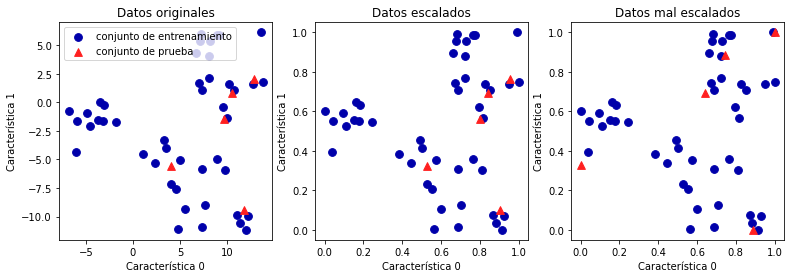

In [8]:
from sklearn.datasets import make_blobs
# Hacer datos sinteticos
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# dividirlo en conjuntos de entrenamiento y de prueba
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# graficar los conjuntos de entrenamiento y de prueba
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],c=mglearn.cm2(0), label="conjunto de entrenamiento", s=60);
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',c=mglearn.cm2(1), label="conjunto de prueba", s=60);
axes[0].legend(loc='upper left');
axes[0].set_title("Datos originales");

# escalar los datos utilizando MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualizar los datos correctamente escalados
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],c=mglearn.cm2(0), label="conjunto de entrenamiento", s=60);
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',c=mglearn.cm2(1), label="Conjunto de prueba", s=60);
axes[1].set_title("Datos escalados")

# reescalar el conjunto de pruebas por separado
# para que el conjunto de prueba min sea 0 y el conjunto de prueba max sea 1
# ¡NO HAGA ESTO! Sólo con fines ilustrativos.

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualizar datos mal escalados
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],c=mglearn.cm2(0), label="conjunto de entrenamiento", s=60);
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],marker='^', c=mglearn.cm2(1), label="conjunto de prueba", s=60);
axes[2].set_title("Datos mal escalados");
for ax in axes:
 ax.set_xlabel("Característica 0");
 ax.set_ylabel("Característica 1");

El primer grafico es un conjunto de datos originales sin escalar, donde el conjunto de entrenamiento mostrado como círculos y el conjunto de prueba mostrado como triángulos. El segunda grafica son los mismos datos, pero escalados utilizando el `MinMaxScaler` . Aquí, llamamos a `fit` en el conjunto de entrenamiento, y luego llamamos a `transform` en los conjuntos de entrenamiento y prueba. Puede ver que el conjunto de datos en el segundo grafico es idéntico al primero; sólo las marcas en los ejes han cambiado. Ahora todas las características están entre 0 y 1. También puede ver que los valores mínimos y máximos de las características para los datos de prueba (el de los datos de prueba (los triángulos) no son 0 ni 1.

El tercer grafico muestra lo que ocurriría si escaláramos el conjunto de entrenamiento y el conjunto de prueba por separado. En este caso, los valores mínimo y máximo de las características del conjunto de entrenamiento y de prueba son 0 y 1. Pero ahora el conjunto de datos tiene un aspecto diferente. Los puntos de prueba se han desplazado de forma incongruente hacia el conjunto de entrenamiento, ya que se han escalado de forma diferente. Está claro que esto no es lo que queremos hacer.

## Datos no correlacionados y reducción de dimensiones

La reducción de dimensiones resume un conjunto de datos utilizando sus patrones comunes. En este capítulo, aprenderá sobre la más fundamental de las técnicas de reducción de dimensiones, el "Análisis de Componentes Principales" ("ACP"). El ACP se utiliza a menudo antes del aprendizaje supervisado para mejorar el rendimiento y la generalización del modelo. También puede ser útil para el aprendizaje no supervisado. 

La reducción de dimensiones encuentra patrones en los datos y utiliza estos patrones para volver a expresarlos en forma comprimida. Esto hace que el cálculo posterior con los datos sea mucho más eficiente. Sin embargo, la función más importante de la reducción de dimensiones es reducir un conjunto de datos a su "esqueleto básico", descartando características ruidosas que causan grandes problemas para tareas de aprendizaje supervisado como la regresión y la clasificación. En muchas aplicaciones del mundo real, es la reducción de dimensiones lo que hace posible la predicción.



El **`análisis de componentes principales`**, abreviado **`ACP`**:
- es un método de interdependencia para resumir la información contenida en las variables y facilitar su análisis.
- El ACP transforma el conjunto de variables originales en un subconjunto más pequeño de variables, las cuales son combinaciones lineales de las primeras, que contienen mayor parte de la variabilidad presente en el conjunto inicial, donde la naturaleza de las variable es cuantitativa

**`Observaciones`**
El objetivo principal del ACP es descubrir la verdadera dimensionalidad del espacio en el que se encuentran los datos. En este proceso se pueden formar nuevas variables, de modo que:
- No estén correlacionadas.
- La primera componente principal explique tanto de la variabilidad en los datos como sea posible.
- Cada componente subsiguiente tome en cuenta tanto de la variabilidad restante como sea posible.
- En el caso de no correlación entre las variables originales, el ACP no tiene mucho que hacer, pues las componentes se corresponderían con cada variable por orden de magnitud 
en la varianza.
- Se presentará esta técnica como una herramienta exploratoria para facilitar la descripción e interpretación de los datos, es decir es una técnica descriptiva.


### Visualización de la transformación ACP

Analicemos el conjunto de datos llamado <a href="https://archive.ics.uci.edu/ml/datasets/wine">`wine`</a> , y solo tomaremos las variables para comprender el tema más detallado:
- `total_phenols`: Fenoles totales
- `od280`: OD280/OD315 de vinos diluidos

In [9]:
# importamos nuevamente las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Carguemos los datos
wine = pd.read_csv('./data/wine.csv')
wine.tail(5)

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
173,3,Barbera,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,Barbera,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,Barbera,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,Barbera,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,Barbera,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [11]:
# Seleccionemos las variables mencionadas anteriormente
samples = wine[['total_phenols','od280']]
samples.head()

,total_phenols,od280
0,2.80,3.92
1,2.65,3.40
2,2.80,3.17
3,3.85,3.45
4,2.80,2.93


Inicialmente verifiquemos si estan correlacionadas las variables

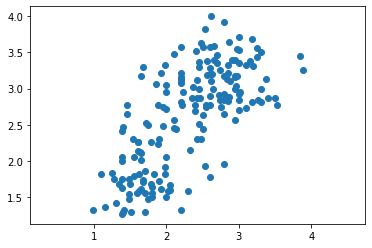

0.6999493647911867 1.5939800322019308e-27


In [12]:
# importar el paquete estadístico
from scipy.stats import pearsonr

# diagrama de dispersión de total_phenols vs od280
plt.scatter(samples['total_phenols'], samples['od280'])
plt.axis('equal')
plt.show()

# Calculo de la correlación de pearson
correlation, pvalue = pearsonr(samples['total_phenols'], samples['od280'])

# imprimir correlation
print(correlation,pvalue)

Podemos ver que la correlación entre `total_phenols` y `od280` es alta. Con una confianza del 95%, podemos decir que la correlación es significativa.

De otra parte, como las variables mencionadas anteriormente estan correlacionadas, usaremos `ACP` para **`descorrelacionarlas`**, es decir, que no se muevan en el mismo sentido.

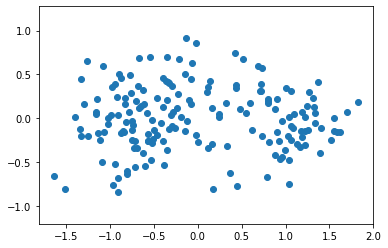

6.279698983036042e-16 0.9999999999999024


(178, 2)

In [13]:
# importamos acp usando scikit-learn
from sklearn.decomposition import PCA
model = PCA()

# .fit() es el metodo de ajuste que ayuda a como cambiar y rotar el conjunto de datos
model.fit(samples)

# .transform este metodo aplica la transformación aprendida del conjunto de datos. 
# En particular, se puede aplicar a nuevos datos 
transformed = model.transform(samples) 

# Asigna a la primera columna de transformed: xs
xs = transformed[:,0]

# Asigna a la primera column de transformed: ys
ys = transformed[:,1]

# diagrama de dispersión xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculo de la correlación xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation,pvalue)

transformed.shape

Se puede observar en la ultima que el `ACP` roto la muestra para que estén alineadas con los ejes coordenados y su media se encuentra en (0,0). Con una confianza del 95% podemos decir que no hay correlación en las variables transformadas. 

Además, si queremos saber la primera componente principal de los datos, recuerde que es la dirección en la que los datos varían más; por lo que usaremos `ACP` para encontrar el primer componente principal de las medidas de `total_phenols` y `od280` de la muestra de vino y representarlo como una flecha en el diagrama de dispersión.

[-0.64116665 -0.76740167]


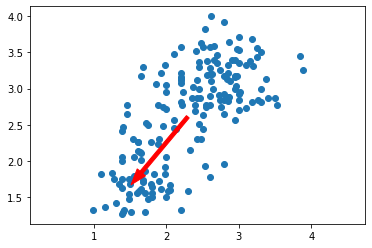

In [14]:
# Diagrama de dispersión de los datos originales
plt.scatter(samples['total_phenols'], samples['od280'])

# Crear la instancia ACP: model
model = PCA()

# Modelo ajustado para los puntos
model.fit(samples)

# Obtener la media de las muestras del vino: mean
mean = model.mean_

# Obtener el primer componente principal: primera_cp
# print(model.components_)
# print(model.components_[0,:])
primera_cp = model.components_[0,:]
print(primera_cp)
# graficamos primera_cp como una flecha, comenzando en la media
plt.arrow(mean[0], mean[1], primera_cp[0], primera_cp[1], color='red', width=0.05)

# Mantener los ejes en la misma escala
plt.axis('equal')
plt.show()

**`Ejercicio 2`**

Cargue el conjunto de datos `grains` y realice un análisis similar a lo explicado anteriormente con las variables ancho (columna cero) y largo (columna uno)



### Dimensión intrinseca

La **`dimensión intrínseca`** de un conjunto de datos es el número de características necesarias para aproximarlo. La dimensión intrínseca informa la reducción de la dimensión, porque nos dice cuánto se puede comprimir un conjunto de datos.

Además, la dimensión intrinseca se puede identificar contando las características del `ACP` que tiene una variación alta.

Consideremos el conjunto de datos <a href="https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris">`iris`</a> para mostrar el proceso de la dimensión intrinseca. Solo tomaremos 3 variables `sepal length`, `sepal width` y `petal width`.

In [15]:
# carguemos el conjunto de datos iris
iris = pd.read_csv('./data/iris.csv')
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [16]:
# grafico de dispersión con las variables mencionadas para el análisis
import plotly.express as px 
  
df = px.data.iris() 
  
fig = px.scatter_3d(df, x = 'sepal_width',  
                    y = 'sepal_length',  
                    z = 'petal_width')#,
                   # color = 'species') 

fig.show()

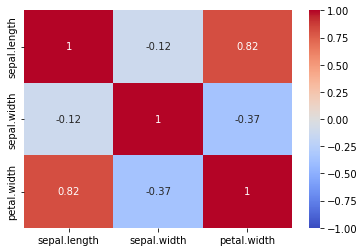

In [17]:
# Veamos la correlación entre las variables
import seaborn as sns

# seleccionar las columnas
samples = iris[['sepal.length','sepal.width','petal.width']]

# mapa de calor de la correlación
sns.heatmap(samples.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm');

Con el analisis exploratorio hecho anteriormente, procedemos a aplicar ACP para encontrar la dimesión intrinseca.

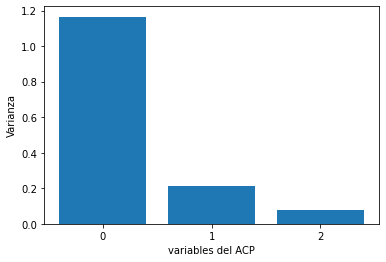

In [18]:
# importar paquetes
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# creamos el modelo y ajustamos
model = PCA()
model.fit(samples)

# crear un rango que enumere las característica del ACP
caract = range(model.n_components_)

# grafiquemos la varianza explicada del modelo ACP
plt.bar(caract,model.explained_variance_)
plt.xticks(caract)
plt.ylabel('Varianza')
plt.xlabel('variables del ACP')
plt.show()

Para este ejercicio podemos tomados como dimensión intrinseca igual a 2, por que es la varianza máxima explicada

**`Ejericicio 3`**

- Cargue los datos de fish, haga un análisis exploratorio de las 6 variables
- Desarrolle el codigo siguiente

In [19]:
# Importación de paquetes necesarios
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Usa un escalador: escalado
## escalado = ____

# Crea la instancia ACP: acp
## acp = ____

# Crea pipeline: pipeline
## pipeline = ____

# Ajuste el pipeline para samples (muestra de fish)
## ____

# Grafique la varianza explicada
## caract = ____
## plt.bar(____, ____)
## plt.xlabel('Variables del ACP')
## plt.ylabel('varianza')
## plt.xticks(caract)
## plt.show()

### Reducción de la dimensión con ACP

La reducción de dimensiones representa los mismo datos usando menos variables y es vital construir canalizaciones de aprendizaje automatico utilizando datos del mundo real.

Anteriormente vimos que las variables del `ACP` están en orden de variación decreciente (ver figura siguiente), por lo que se descarta las variables del `ACP` con menor varianza. Esto nos indica que las variables del `ACP` con mayor varianza son más informativas.
<center>

![](imgs/varexp.png)

</center>

Ahora, consideremos el conjunto de datos **`iris`** con sus 4 variables `sepal.length`, `sepal.width`, `petal.length` y `petal.width`. Hagamos el gráfico de la varianza explicativa. (Ejercicio: análisis exploratorio de las 4 variables).

In [20]:
iris.iloc[:, :4].shape

(150, 4)

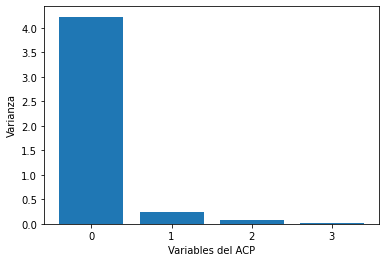

In [21]:
# importar paquetes
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# seleccion de las variables del conjunto iris
samples = iris[['sepal.length','sepal.width','petal.length','petal.width']]

# creamos el modelo y ajustamos
model = PCA()
model.fit(samples)

# crear un rango que enumere las característica del ACP
caract = range(model.n_components_)

# grafiquemos la varianza explicada del modelo ACP
plt.bar(caract,model.explained_variance_)
plt.xticks(caract)
plt.ylabel('Varianza')
plt.xlabel('Variables del ACP')
plt.show()

Podemos notar que la varianza máxima explicativa, se puede encontrar en 2 dimensiones. Ahora creamos el modelo de `ACP` para solo 2 dimensiones.

In [22]:
# importar paquetes
from sklearn.decomposition import PCA

# modelo para la dimensión intrinseca 2
acp = PCA(n_components=2)

# modelo ajustado
acp.fit(samples)

# transformamos los datos
transformed = acp.transform(samples)
print(transformed.shape)

(150, 2)


Ahora, hagamos un diagrama de dispersión con los datos transformados

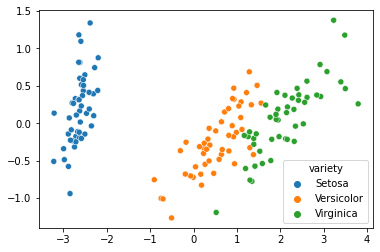

In [23]:
# importar paquetes
import seaborn as sns

xs = transformed[:,0]
ys = transformed[:,1]
sns.scatterplot(x=xs, y=ys, hue=iris.variety)
plt.show()

El diagrama de dispersión de dos variables de `ACP`. A pesar de reducir la dimensión de 4 a 2, aún se puede distinguir las especies. 

**`Ejercicio 4`**

En un ejercicio 3, se vio que 2 es la dimensión intrínseca de las medidas de los peces. Ahora utilice PCA para reducir la dimensionalidad de las medidas de los peces, reteniendo sólo los 2 componentes más importantes.

Siga las siguientes instrucciones:
- Importa `PCA` desde `sklearn.decomposition`.
- Crea un modelo de `ACP` llamada `acp` con `n_components=2`.
- Use el metodo `.fit()` de `acp` para ajustarlo a las medidas de los peces escalados llamado `scaled_samples`.
- Utilice el método `.transform()` de `acp` para transformar las muestras escaladas. Asigna el resultado a `variables_acp`.

**`Observación`**

En algunos casos, es necesario utilizar un implementación alternativa del `ACP`. Por ejemplo una matrices de frecuencia de palabras. En una matriz de frecuencia de palabras, cada fila corresponde a un documento y cada columna corresponde a una palabra de un vocabulario fijo. Las entradas de la matriz de frecuencia de palabras miden con qué frecuencia aparece cada palabra en cada documento. Solo algunas de las palabras del vocabulario aparecen en cualquier documento, por lo que la mayoría de las entradas de la matriz de frecuencia de palabras son cero.

También, se dice que las matrices como estas son `Sparse` y, a menudo, es representado usando un tipo especial de arreglo llamado **`csr_matrix`**. Esto ahorra espacio al recordar solo las entradas distintas de cero de la matriz.

<center>

![](imgs/wfa.png)

</center>

El `ACP` no es compatible con este tipo de matrices csr, y en el lugar `PCA()`, usaremos `TruncatedSVD()` del paquete `sklearn`. Esto quiere decir que `TruncatedSVD()` usa la misma transformación de `PCA()` pero acepta matrices csr como entrada

In [101]:
wiki = pd.read_csv('./data/wikipedia-vectors.csv',index_col=0).T
#wiki.shape
wiki.iloc[:4, :10]

,0,1,2,3,4,5,6,7,8,9
HTTP 404,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Alexa Internet,0.0,0.0,0.029607,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Internet Explorer,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.003772,0.0,0.0
HTTP cookie,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [105]:
# importar paquete
from scipy.sparse import csr_matrix

# matriz csr
wiki_sparse = csr_matrix(wiki)
# wiki_sparse

print(wiki_sparse.shape)

(60, 13125)


In [106]:
# importar paquete 
from sklearn.decomposition import TruncatedSVD

# ACP para conjunto de datos que sean matrices csr
model = TruncatedSVD(n_components=3)

# Modelo ajustado
model.fit(wiki_sparse)  # documents is csr_matrix

# transformación
transformed = model.transform(wiki_sparse)

# imprimir
transformed.shape

(60, 3)

## Descubriendo variables interpretables 

En este capítulo, aprenderá sobre otra tecnica de reducción de dimensiones llamada "factorización de matriz no negativa" (`FMN`) que expresa muestras como combinaciones de partes interpretables. Por ejemplo, expresa documentos como combinaciones de temas e imágenes en términos de patrones visuales comunes. ¡También aprenderá a usar `FMN` para crear sistemas de recomendación que pueden encontrar artículos similares para leer o artistas musicales que coincidan con su historial de escucha!

### Factorización de matriz no negativa
`FMN` significa **`factorización de matriz no negativa`**. `FMN`, como `PCA`, es una técnica de reducción de dimensiones. Sin embargo, a diferencia de `ACP`, los modelos `FMN` son **interpretables**. Esto significa que los modelos `FMN` son más fáciles de entender y mucho más fáciles de explicar que los demás. Sin embargo, `FMN` no se puede aplicar a todos los conjuntos de datos. Se requiere que las características de la muestra sean "no negativas", es decir, mayores o iguales a 0.

`FMN` logra su interpretabilidad al descomponer las muestras como sumas de sus partes. Por ejemplo:
- `FMN` descompone documentos como combinaciones de temas comunes. 
<center>

![](imgs/FMN1.png)

</center>

- `FMN` descompone las imágenes como combinaciones de patrones comunes
<center>

![](imgs/FMN2.png)

</center>

El método de `FMN` esta disponible en `scikit-learn` y sigue el mismo patrón de `fit` y `tranform` del `ACP`. Sin embargo, a diferencia de `ACP`, siempre se debe especificar el número deseado de componentes. `FMN` funciona tanto con matrices `numpy` como con matrices dispersas en el formato `csr_matrix`.

**`Ejemplo`**. Estos son datos sencillos de una matriz de frecuencia de palabras. Aquí, solo hay 4 palabras en el vocabulario, y estas corresponden a 4 columnas, Además, cada fila representa un documento y las entradas de la matriz miden la proporción de cada palabra en el documento usando lo que se conoce como <a href="https://en.wikipedia.org/wiki/Tf%E2%80%93idf">`tf-idf`</a>.
<center>

![](imgs/e1.png)

</center>

El `tf-idf` es una medida de la originalidad de una palabra que compara el número de veces que una palabra aparece en un documento con el número de veces que la palabra aparece.

In [58]:
documentos = ['cats say meow', 'dogs say woof', 'dogs chase cats']

# Importar TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Aplicar fit_transform para documentos: csr_mat
samples = tfidf.fit_transform(documentos)

# imprimir resultado
print(samples.toarray())

# Obtener las palabras: palabra
palabra = tfidf.get_feature_names_out();

print(palabra)

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats' 'chase' 'dogs' 'meow' 'say' 'woof']


Ahora, hagamos un ejemplo de <a href="https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris">`FMN`</a>

In [28]:
# Ejemplo del uso de FMN

# Importar FMN
from sklearn.decomposition import NMF;

# Se especifica el número de componentes
model = NMF(n_components=2, init = 'nndsvd')

# Ajustamos el modelo a los datos samples
model.fit(samples)

# Transformación
nmf_features = model.transform(samples)

# las componentes del FMN
print(model.components_)

[[7.39385305e-01 4.86145903e-01 3.69697719e-01 4.86056916e-01
  3.69630041e-01 0.00000000e+00]
 [3.30829344e-09 0.00000000e+00 4.64314508e-01 2.37651706e-05
  4.64350652e-01 6.10541538e-01]]


In [29]:
print(nmf_features)

[[7.00345146e-01 6.30067789e-05]
 [0.00000000e+00 1.11526983e+00]
 [7.00435872e-01 0.00000000e+00]]


**`Observación`**:

- La dimensión de los componentes es la misma que la dimensión de las matriz `samples`. Para entender un poco más tenemos 6 palabras y número espacio tendran 6 componontes.
- Las componentes de `FMN` son siempre no negativas.
- Los valores de la variables de `FMN` tampoco son negativos. Además, nuestros datos transformados en este ejemplo tendran dos columnas, correspondientes a nuestras dos nuevas caracteristicas.

Las caracteristicas y las componentes de un modelo `FMN` se pueden combinar para reconstruir aproximadamente las muestras de datos originales. Por ejemplo:

In [60]:
# un documento del conjunto de datos
print(samples[1,:].toarray())

# Los valores de las variables de FMN
print(nmf_features[1,:])

[[0.         0.         0.51785612 0.         0.51785612 0.68091856]]
[0.         1.11526983]


Ahora, si multiplicamos cada componente `FMN` por la característica `FMN` correspondiente y sumamos cada columna, obtenemos el `sample` original.

In [61]:
reconstruction = np.dot(nmf_features[1,:],model.components_)
print(reconstruction)

[3.68963986e-09 0.00000000e+00 5.17835961e-01 2.65045778e-05
 5.17876273e-01 6.80918557e-01]


**`Ejercicio 1`**

Ahora es su turno de aplicar `FMN`, esta vez usando la matriz de frecuencia de palabras `tf-idf` de los artículos de Wikipedia, dada como una matriz csr articulos (`articulo = wiki_sparse`). Aquí, ajuste el modelo y transforme los artículos. En el siguiente ejercicio, explorará el resultado.

**Instrucciones**
- Importar `NMF` desde `sklearn.decomposition`.
- Cree una instancia `NMF` llamada `model` con 6 componentes.
- Ajuste el modelo a los datos de conteo de palabras articles.
- Utilice el método `.transform()` de `model` para transformar `articulo` y asigne el resultado a `nmf_features`.
- Imprima `nmf_features` para tener una primera idea de cómo se ve (redondea las entradas a 2 decimales).


**`Ejercicio 2`**

Ahora explorará las funciones `FMN` que se hizo en el ejercicio anterior. Usaremos matriz `nmf_features` del ejercicio anyerior. También está disponible una lista `titles` con el título de cada artículo de Wikipedia.

Supongamos que al investigar las funciones, observe que los actores `Anne Hathaway` y `Denzel Washington`,  la característica 3 del `FMN` tiene, con mucho, el valor más alto. Esto significa que ambos artículos se reconstruyen utilizando principalmente el tercer componente del `FMN`.

**Instrucciones**

- Importar `pandas` como `pd`.
- Cree un DataFrame `df` a partir del `nmf_features` uso de `pd.DataFrame()`. Establezca el índice para `titles` usar `index=titles`.
- Use el `.loc[]` acceso de `df` para seleccionar la fila con título `Anne Hathaway` e imprima el resultado. Estas son las características de `FMN` para el artículo sobre la actriz Anne Hathaway.
- Repita el último paso para `Denzel Washington` (otro actor).


### FMN aprende las partes interpretables

En esta sección, aprenderemos que las componentes de `FMN` representan patrones que ocurren con frecuencia en las muestras. Consideremos un ejemplo, donde los artículos científicos están representados por sus frecuencias de palabras. 

In [88]:
wiki = pd.read_csv('./data/wikipedia-vectors.csv',index_col=0).T
wiki.iloc[:4, :10]

,0,1,2,3,4,5,6,7,8,9
HTTP 404,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Alexa Internet,0.0,0.0,0.029607,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
Internet Explorer,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.003772,0.0,0.0
HTTP cookie,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [89]:
# importar paquete
from scipy.sparse import csr_matrix

# matriz csr
articles = csr_matrix(wiki)
print(articles.shape)

(60, 13125)


Hay 60 artículos y 13125 palabras.
<center>

![](imgs/e2.PNG)

</center>

In [63]:
# ajuste del modelo con FMN
from sklearn.decomposition import NMF

# modelo de FMN con 6 componente a los articulos
nmf = NMF(n_components=6,init='nndsvd') 

# ajuste del modelo con FMN
nmf.fit(articles)

# imprimir componentes
print(nmf.components_.shape)

(6, 13125)


Las filas, o componentes, viven en un espacio de 13125 dimensiones: hay una dimensión para cada una de las palabras. Alinear las palabras de nuestro vocabulario con las columnas de los componentes `FMN` permite interpretarlas.
<center>

![](imgs/e3.PNG)

</center>

Elegir un componente, como este, y observar qué palabras tienen los valores más altos,
<center>

![](imgs/e4.PNG)

</center>


Vemos que encajan en un tema: las palabras son `species`, `plant`, `plants`, `genetic`, `evolution` y `life`.
<center>

![](imgs/e5.png)

</center>

En conclusión, si `FMN` se aplica a los documentos, las componentes corresponden a los temas y las características de `FMN` reconstruyen los documentos a partir de los temas.

Así como los `FMN` se aplican a los documentos. Tambien, este se puede aplicar a descomponer las imagenes. Por ejemplo:
<center>

![](imgs/FMN2.png)

</center>

Pero para realizar este proceso, debemos saber como representar una colección de imagenes como una matriz no negativa.

Una **`imagen en escala de grises`** es una imagen en las que todos los píxeles son tonos de gris que van del negro al blanco, de los cuales se pueden codificar (1 es totalmente blanco y 0 es totalmente negro). Por ejemplo:
<center>

![](imgs/i1.png)

</center>
y despues

<center>

![](imgs/i2.png)

</center>

Además, las entrades de esta matriz no son negativas, por lo que se puede usar `FMN` para aprender las partes de las imagenes
<center>

![](imgs/i3.png)

</center>

[[0.  1.  0.5]
 [1.  0.  1. ]]


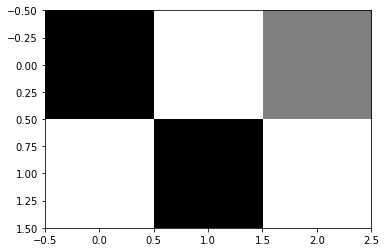

In [65]:
# importar 
from matplotlib import pyplot as plt
import numpy as np

# vector de entradas
sample = np.array([0, 1, 0.5, 1, 0, 1])
bitmap = sample.reshape((2, 3))
print(bitmap)

# grafica
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.show()

**`Ejercicio 1`**

Sabemos cuándo se aplica `FMN` a los documentos, los componentes corresponden a los temas de los documentos y las funciones de `FMN` reconstruyen los documentos a partir de los temas. Verifíquelo usted mismo para el modelo `FMN` que construyó anteriormente usando los artículos de Wikipedia. Anteriormente, vio que el valor de la tercera función `FMN` era alto para los artículos sobre los actores `Anne Hathaway` y `Denzel Washington`. En este ejercicio, identifique el tema de la componente `FMN` correspondiente.

El modelo `FMN` que creó anteriormente está disponible como `model`, mientras que `words` es una lista de las palabras que etiquetan las columnas de la matriz de frecuencia de palabras. Una vez que haya terminado, tómese un momento para reconocer el tema que tienen en común los artículos sobre `Anne Hathaway` y `Denzel Washington`.

**Instrucciones**

- Importar `pandas` como `pd`.
- Cargar los datos del vocabulario de Wikipedia. Usar `read_fwf()` y convertir en lista.
- Cree un `DataFrame` `components_df` desde `nmf.components_`, configurando `columns=words` para que las columnas estén etiquetadas por las palabras.
- Imprima `components_df.shape` para verificar las dimensiones del `DataFrame`.
- Use el descriptor de `.iloc[]` en `DataFrame` `components_df` para seleccionar la fila 3. Asigne el resultado a `component`.
- Llame al método `.nlargest()` de componente imprima el resultado. Esto da las cinco palabras con los valores más altos para ese componente.

**`Ejercicio 2`**

En los siguientes ejercicios, utilizará `FMN` para descomponer imágenes en escala de grises en sus patrones comunes. En primer lugar, explore el conjunto de datos de la imagen y vea cómo se codifica como una matriz. Se le dan 100 imágenes como una matriz 2D `samples`, donde cada fila representa una sola imagen de 13 x 8. Las imágenes en su conjunto de datos son imágenes de una pantalla digital LED.

**Instrucciones**
- Importar `matplotlib.pyplot` como plt y `pandas` como `pd`.
- Carga los datos de ldc-digits.csv y conviertalo en una matriz y llamelos `samples`.
- Seleccione la fila 0 de `samples` y asigne el resultado a `digit`. Por ejemplo, para seleccionar la columna 2 de una matriz A, podría usar `a[:,2]`. Recuerde que dado que `samples` es una matriz `NumPy`, no puede usar los accesores .loc[] o iloc[]para seleccionar filas o columnas específicas.
- Imprimir `digit`. Observe que es una matriz 1D de 0 y 1.
- Utilice el método `.reshape()` de `digit` para obtener una matriz 2D con forma (13, 8). Asigne el resultado a `bitmap`.
- Imprima `bitmap` y observe que los 1 muestran el dígito 7.
- Utilice la función `plt.imshow()` para mostrar `bitmap` como una imagen.

**`Ejercicio 3`**

Ahora use lo que aprendió sobre `FMN` para descomponer el conjunto de datos de dígitos. Nuevamente se le dan las imágenes de dígitos como una matriz 2D `samples`. Esta vez, también se le proporciona una función `show_as_image()` que muestra la imagen codificada por cualquier matriz 1D:


In [70]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

Una vez que haya terminado, tómese un momento para mirar a través de los gráficos y observe cómo  `FMN` ha expresado el dígito como una suma de los componentes.

**Instrucciones**

- Importar `NMF` desde `sklearn.decomposition`.
- Crea la instancia `FMN` instancia llamada `model` con 7 componentes. (7 es el número de celdas en una pantalla LED).
- Aplicar el método `.fit_transform()` del modelo para `samples`. Asigne el resultado a `features`.
- A cada componente del modelo (al que se accede mediante `model.components_`), aplique la función `show_as_image()` a ese componente dentro del bucle (`for component in model.components_:`).
- Asigne la fila 0 de `features` a `digit_features`.
- Imprimir `digit_features`.

**`Ejercicio 4`**

A diferencia de `FMN`, `ACP` no aprende las partes de las cosas. Sus componentes no corresponden a temas (en el caso de documentos) ni a partes de imágenes, cuando se entrena sobre imágenes. Verifique esto usted mismo inspeccionando los componentes de un modelo `ACP` que se ajuste al conjunto de datos de imágenes de dígitos LED del ejercicio anterior. Las imágenes están disponibles como una matriz 2D `samples`. También está disponible una versión modificada de la función `show_as_image()` que colorea un píxel rojo si el valor es negativo.

Después de enviar la respuesta, observe que los componentes de `ACP` no representan partes significativas de imágenes de dígitos LED.

**Instrucciones**
- Importar `PCA` desde `sklearn.decomposition`.
- Cree una instancia `PCA` llamada `model` con 7 componentes.
- Aplicar el método `.fit_transform()` para `samples`. Asigne el resultado a `features`.
- A cada componente del modelo (al que se accede mediante `model.components_`), aplique la función `show_as_image()` a ese componente dentro del bucle (`for component in model.components_:`).

### Creación de sistemas de recomendación con FMN

Dado un artículo, ¿cómo puedo recomendar artículos similares al artículo que un cliente está leyendo actualmente?¿cómo puede encontrar artículos que tengan temas similares?.

Nuestra estrategia para resolver este problema es aplicar `FMN` a la matriz de frecuencia de palabras de los artículos y utilizar las variables de `FMN` resultantes. Entonces, artículos similares tendrán variables `FMN` similares. 

Pero, ¿cómo se pueden comparar dos artículos usando sus variables `FMN`?

In [90]:
# cargar los datos
articles = csr_matrix(wiki)

# importar paquetes
from sklearn.decomposition import NMF

# instancia de FMN
nmf = NMF(n_components=6, init= 'nndsvd')

# variables de FMN
nmf_features =nmf.fit_transform(articles)


Hasta este momento tenemos funciones `FMN` para cada artículo, dadas por las columnas de la nueva matriz. Ahora, el objetivo es definir como comparar artículos usando las variables de `FMN`.

**Documentos similares tienen temas similares**, pero no siempre se da el caso de que los valores de las funciones `FMN` sean exactamente iguales. Por ejemplo una versión de un documento puede usar un lenguaje muy directo, mientras que otras versiones pueden intercalar el mismo contenido con charlas sin sentido. La **charla sin sentido** reduce la frecuencia de las palabras del tema en general, lo que reduce los valores de las variables de `FMN` que representan los temas. Sin embargo, en un diagrama de dispersión de las variables de `FMN`, todas estas versiones se encuentran en una sola línea que pasa por el origen.

<center>

![](imgs/sw1.png)

</center>

Por está razón, al comparar dos documentos, es una buena idea comparar estas líneas usando la **similitud del coseno**, que usa el ángulo entre las dos líneas y los  valores más altos indican una mayor similitud.

<center>

![](imgs/cos.png)

</center>

In [91]:
from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features)

# si escogemos el indice 23
current_article = norm_features[45,:]

# las similitudes del coseno
similarities = norm_features.dot(current_article)
print(similarities)

[0.         0.         0.         0.         0.         0.
 0.01681558 0.         0.05444652 0.05650837 0.05336572 0.
 0.03566246 0.         0.0879928  0.         0.         0.
 0.         0.         0.11148087 0.         0.         0.
 0.         0.00108846 0.         0.         0.         0.0227742
 0.0072764  0.00194715 0.02402154 0.         0.         0.01157072
 0.016028   0.07835948 0.         0.         1.         1.
 0.99986708 0.99994581 0.99943205 1.         0.99996118 0.98794569
 0.99111711 0.99999964 0.         0.         0.004899   0.
 0.         0.         0.         0.0123205  0.53860954 0.03471894]


Ahora veamos las etiquitas de las similitudes con los títulos de los artículos

In [97]:
# importar pandas
import pandas as pd

# crear dataframe
df = pd.DataFrame(norm_features, index=wiki.index)

# Selecionar los valores normalizados para el artículo actual 
current_article = df.loc['Hepatitis C']

# similitudes
similarities = df.dot(current_article)

# imprimir
print(similarities.nlargest())

Tonsillitis    1.000000
Hepatitis B    1.000000
Hepatitis C    1.000000
Lymphoma       1.000000
Prednisone     0.999961
dtype: float64


Aquí, vemos que todos ellos están relacionados con `Hepatitis C`

**`Ejercicio 1`**
 Aplique dado lo anterior a este modelo `FMN` para artículos populares de Wikipedia, encontrando los artículos más similares al artículo sobre el futbolista `Cristiano Ronaldo`. Las variables de `FMN` que obtuvo anteriormente están disponibles como `nmf_features`, mientras que `titles = wiki.index` es una lista de los títulos de los artículos.

In [98]:
# Importar paquetes
## import pandas as pd
## from ____ import ____

# Normaliza las variables FMN: norm_features
## norm_features = ____

# Crea un DataFrame: df
## df = ____

# Selecciona la fila correspondiente a 'Cristiano Ronaldo': article
## article = df.loc[____]

# Calcula el producto punto: similarities
## similarities = ____

# Mostrar los que tienen la mayor similitud del coseno
## print(similarities.nlargest())

## Análisis de agrupamiento (cluster)

Aprenda a descubrir los grupos subyacentes (o "clústeres") en un conjunto de datos. Al final de este capítulo, estará agrupando empresas utilizando sus precios de mercado de valores y distinguirá diferentes especies agrupando sus medidas.

### Clusters

El <a href="https://scikit-learn.org/stable/modules/clustering.html#clustering">**`análisis  de cluster`**</a> es un conjunto de técnicas multivariantes utilizadas para clasificar a un conjunto de individuos en grupos homogéneos.

El `agrupamiento` como tal no es una tarea con solución directa, sino un proceso iterativo o interactivo que implica ensayo y error. Este proceso de prueba y error es iterativo en la medida que sea automático, e interactivo en la medida que requiera intervención humana. Es una práctica usual ejecutar un algoritmo de agrupamiento (un proceso iterativo), y a partir de los resultados ajustar los parámetros y repetir la operación (resultando en un proceso interactivo).

Las aplicaciones del agrupamiento se dividen en dos tipos principalesː

- Aquellas en la que los grupos constituyen el resultado buscado
- otras en las que los grupos constituyen el punto de partida para la clasificaciones de nuevas muestras de datos, desconocidas al momento de procesar el agrupamiento

Para el análisis exploratorio por agrupamiento usaremos el conjunto de datos `iris`

In [2]:
# importar modulos
import pandas as pd

# carguemos el conjunto de datos iris
iris = pd.read_csv('./data/iris.csv')
iris.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
# información de las variable
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Tomemos una muestra
iris_samples = iris.sample(n=75, replace=False, random_state=3)
X_iris = iris_samples.iloc[:, :4]
y_iris = iris_samples.variety

Recuerde que la matriz de `X_iris` es de 4 dimensiones, por lo que no es posible dibujar 4 dimensiones. Pero usnado técnicas de aprendizaje no supervisado podemos obtener información que nos ayuden a visualizar los datos, por lo que agruparemos estas muestras utilizando el agrupamiento **`k-means`**. 

`k-means` encuentre un número especifico de grupos en la muestra.

In [5]:
# importar modulo
from sklearn.cluster import KMeans

# modelo de cluster con 3 grupos, puesto que hay 3 grupos
iris_model = KMeans(n_clusters=3)

# metodo de ajuste del modelo
iris_model.fit(X_iris)

# predicción
iris_labels = iris_model.predict(X_iris)
iris_labels

array([1, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2, 0, 2, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1,
       0, 2, 2, 1, 2, 0, 1, 1, 2])

Ahora, si tenemos muestras nuevas de iris, `k-means` puede determinar a que clústers pertenece sin empezar de nuevo, ya que recuerda la media de las muestras en cada grupo, estos se llaman **`centroides`**. Además, las nuevas muestras se asignan al grupo cuyo centroide esta más cerca.

In [6]:
# nuevos datos 
iris_new_samples = iris[~iris.index.isin(iris_samples.index)].copy()
X_iris_new = iris_new_samples.iloc[:, :4]
y_iris_new = iris_new_samples.variety

# predicciones de los nuevos datos
iris_new_labels = iris_model.predict(X_iris_new)
iris_new_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       2, 0, 0, 2, 2, 0, 2, 2, 0])

In [7]:
# agregar nuevas columnas a los dataframes
iris_new_samples['pred_labels'] = iris_new_labels
iris_samples['pred_labels'] = iris_labels

# crear nuevo df de las etiquetas predecidas
pred_labels = pd.concat([iris_new_samples[['variety', 'pred_labels']], iris_samples[['variety', 'pred_labels']]]).sort_index()
pred_labels.sample(n=5,replace=False)

,variety,pred_labels
122,Virginica,2
80,Versicolor,0
115,Virginica,2
97,Versicolor,0
55,Versicolor,0


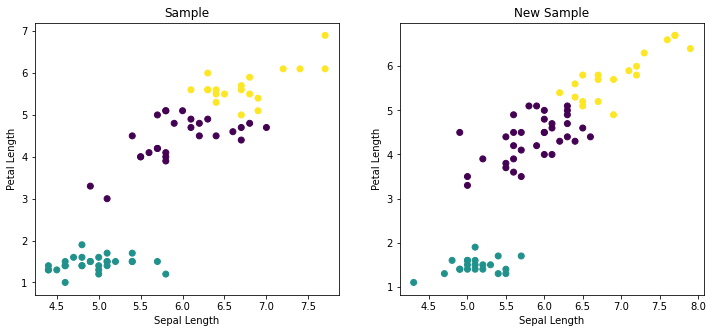

In [8]:
#importar paquete
import matplotlib.pyplot as plt

# graficas las muestras
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
iris[['sepal.length','petal.width']]
xs = X_iris[['sepal.length']]
ys = X_iris[['petal.length']]
xs_new = X_iris_new[['sepal.length']]
ys_new = X_iris_new[['petal.length']]

ax1.scatter(xs, ys, c=iris_labels)
ax1.set_ylabel('Petal Length')
ax1.set_xlabel('Sepal Length')
ax1.set_title('Sample')

ax2.scatter(xs_new, ys_new, c=iris_new_labels)
ax2.set_ylabel('Petal Length')
ax2.set_xlabel('Sepal Length')
ax2.set_title('New Sample')
plt.show()

**`Ejercicio 1`**

En este ejercicio se usaran los datos del paquete `seaborn`, llamado **`penguins`**. Haga un análisis exploratorio respectivo y haga un diagrama de dispersión `bill_length_mm` y `bill_depth_mm` según la especie. Haga el mismo proceso realizado anteriormente.

In [11]:
# importar los paquetes seaborn y matplotlib.pyplot
## ____

# Cargar los datos y eliminar los datos faltantes
## pen = sns.load_dataset('penguins').dropna()

# mostrar las 5 primeras filas
## ____

# mostrar la información de las variables
## ____

# Diagrama de dispersión
## xs = ____
## ys = ____

## sns.scatterplot(x=xs, y=ys, hue=pen.species)
## plt.legend(title='Especies', bbox_to_anchor=(1.05, 1), loc='upper left')
## plt.title('Especies con etiquetas reales')
## plt.show()

**`Ejercicio 2`**

Del diagrama de dispersión del ejercicio anterior, viste que los puntos parecen separarse en 3 grupos. Ahora creará un modelo de K-means para encontrar 3 clústers y lo ajustará a los puntos de datos del ejercicio anterior. Una vez ajustado el modelo, obtendrá las etiquetas de conglomerados para algunos puntos nuevos utilizando el método `.predict()`.

Cree la matriz `points` y también una matriz `new_points` para desarrollar el ejercicio.

**Instrucciones**
- Importar `KMeans` desde `sklearn.cluster`.
- usando `KMeans()`, cree una instancia `KMeans` llamada `model` para buscar 3 clústers. Para especificar el número de clústeres, utilice el argumento `n_clusters`.
- Utilice el método `.fit()` para ajustar el modelo a las variables del conjunto de datos `points`.
- Utilice el método `.predict()` de `model` para predecir las etiquetas de conglomerados de `new_points`, asignando el resultado a `labels`.
- Haga dos diagramas de dispersión `bill_length_mm` y `bill_depth_mm` según la predición de las etiquetas y las nuevas etiquetas

**`Ejercicio 3`**

¡Veamos ahora el agrupamiento que realizó en el ejercicio anterior!

Ya se ha ejecutado una solución al ejercicio anterior, también lo `new_points` es una matriz de puntos y `labels` es la matriz de sus etiquetas de clúster.

In [65]:
# Import pyplot
## ____

# Asigna las columnas de new_points a: xs y ys
## xs = ____
## ys = ____

# Hacer un diagrama de dispersión de xs y ys, usando labels para definir los colores
## ____

# Asignar los centros del cluster : centroides
## centroids = ____

# Asigna las columnas de los centroides: centroids_x, centroids_y
## centroids_x = centroids[:,0]
## centroids_y = centroids[:,1]

# Hacer un diagrama de dispersión agregando centroids_x y centroids_y
## ____
## plt.show()

### Evaluación de un agrupamiento

Anteriormente, usamos `k-means` para agrupar las muestras de iris en 3 grupos. Pero ¿como podemos evaluar la calidad de este cluster?.

Para los datos `iris`, un enfoque directo es comparar los grupos con las especies. Primero aprenderá sobre esto, antes de considerar el problema de cómo medir la calidad de un agrupamiento de una manera que no requiera que nuestras muestras vengan agrupadas previamente en especies. Esta medida de calidad se puede usar para tomar una decisión informada sobre la cantidad de grupos que se deben buscar. 

En primer lugar, verifiquemos si los 3 grupos de muestras de `iris` tienen alguna correspondencia con las especies de iris. La correspondencia se describe en esta tabla cruzada. Recuerde que las tablas cruzadas brindan conocimientos sobre qué tipo de muestra se encuentra en que grupo.

In [10]:
ct = pd.crosstab(pred_labels.pred_labels, pred_labels.variety)
ct

variety,Setosa,Versicolor,Virginica
pred_labels,,,
0,0,48,14
1,50,0,0
2,0,2,36


Hay una columna para cada una de las tres especies de `iris`: setosa, versicolor y virginica, y una fila para cada una de las tres etiquetas de grupo: 0, 1 y 2. La tabla muestra el número de muestras que tienen cada combinación posible de etiqueta de grupo/especies. Por ejemplo, vemos que el grupo 1 se corresponde perfectamente con la especie setosa. Por otro lado, mientras que el grupo 0 contiene principalmente muestras de versicolor, también hay algunas muestras de virginica en el grupo 2.

Claramente la mayoría de los conjuntos de datos, las muestras no están etiquetadas por especies. ¿Cómo se puede evaluar la calidad de un agrupamiento en estos casos?. Se debe usar la **`inercia`** que mide la distribución de las muestras dentro de cada grupo. Intuituvamente, la `inercia` mide qué tan lejos están las muestras de sus centroides. Como el objetivo es que los grupos no estén dispersos, debemos tener valores más bajos de la inercia, ya que son mejores.

La `inercia` de un modelo de `kmeans` se mide automáticamente cuando cualquiera. Despues se llama a los métodos de ajuste y está disponible después como el atributo de inercia. De hecho, `kmeans` tiene como objetivo colocar los clústeres de manera que se minimice la inercia. Pero ¿cuál es la mejor cantidad de clusters para elegir?

In [11]:
print(iris_model.inertia_)

37.643316528870066


In [21]:
Sum_of_squared_distances = list()
K = range(1, 10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_iris)
    Sum_of_squared_distances.append(km.inertia_)

print(Sum_of_squared_distances)

c:\Users\cdeoroaguado\Anaconda2\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[360.7688, 63.79398826979473, 37.643316528870066, 27.15380939613926, 22.628112979641628, 18.49093742858448, 15.43517125031831, 13.05556946321652, 11.70925518925519]


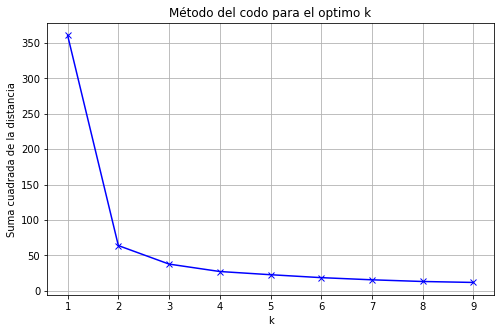

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma cuadrada de la distancia')
plt.title('Método del codo para el optimo k')
plt.grid()
plt.show()

Aquí hay una gráfica de los valores de inercia de las agrupaciones del conjunto de datos del iris con diferentes números de agrupaciones. Nuestro modelo de kmeans con 3 grupos tiene una inercia relativamente baja, lo cual es excelente. Pero observe que la inercia continúa disminuyendo lentamente. Entonces, ¿cuál es la mejor cantidad de clústeres para elegir?

Un buen agrupamiento tiene agrupaciones estrechas (lo que significa baja inercia). Pero tampoco tiene demasiados clústeres. Una buena regla general es elegir un codo en el gráfico de inercia, es decir, un punto donde la inercia comienza a disminuir más lentamente. Por ejemplo, según este criterio, 3 es un buen número de grupos para el conjunto de datos del iris.

**`Ejercicio 1`**

En lo realizado anteriormente, aprendió a elegir una buena cantidad de conglomerados para un conjunto de datos utilizando el gráfico de `inercia` de  `k-means`. Se le entrega una muestra de granos de los datos llamados **`grains`** que contiene las medidas (como el área, el perímetro, la longitud y varias otras) de muestras de grano. ¿Qué es un buen número de clústeres en este caso?

Este conjunto de datos se obtuvo del <a href="https://archive.ics.uci.edu/ml/datasets/seeds">`repositorio de aprendizaje automático de UCI`</a>.

In [25]:
# importar las librerias
## ____
## ____

# carguemos el conjunto de datos grains
## grains = pd.read_csv('./data/grains.csv')
## samples = grains.iloc[:,:-2]

# cargar los datos de grains

## ks = range(1, 6)
## inertias = list

## for k in ks:
##    # Crear la instancia KMeans con k clusters: model
##    ____
    
##    # Modelo ajustado para el conjunto samples
##    ____
    
##    # Usar .append para el valor inertia_ a la lista de inercias
##    ____
    
## # Graficar ks vs inertias
## plt.plot(____, ____, '-o')
## plt.xlabel('número de clusters, k')
## plt.ylabel('inercia')
## plt.xticks(ks)
## plt.show()

,0,1,2,3,4,5,6
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


**`Ejericicio 2`**

En el ejercicio anterior, observó en el gráfico de inercia que 3 es un buen número de conglomerados para los datos de granos. De hecho, las muestras de granos provienen de una mezcla de 3 variedades de granos diferentes: "Kama", "Rosa" y "Canadian". En este ejercicio, agrupe las muestras de granos en tres grupos y compare los grupos con las variedades de granos usando una tabulación cruzada.

Tiene el conjunto de datos grano que es llamado `samples` y una lista `varieties` que proporciona la variedad de grano para cada muestra. 

In [ ]:
# Crea un modelo KMeans con 3 clusters: model
## model = ____

# Usar el metodo .fit_predict de model para ajustarlo a samples y obten las etiquetas de los clusters: labels
## labels = ____

# Crea un DataFrame con etiquetas y varieties como columns: df
## df = pd.DataFrame({'____': labels, '____': varieties})

# Crear tabla cruzada: ct
## ct = ____

# Muestra ct
## print(ct)

### Transformación de funciones para mejores agrupaciones

Para el desarrollo de esta sección usaremos el conjunto de datos de **`wine`**. Carguemos los datos nuevamente

In [28]:
# Carguemos los datos
wine = pd.read_csv('./data/wine.csv')
wine.head(5)

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
wine.shape

(178, 15)

Tenemos 178 muestras de vino y 15 variables